In [1]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
db_store = pandas.read_csv("DA1920_store.csv")
db_train = pandas.read_csv("DA1920_train.csv")

/Users/HelenTran/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
db_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Unnamed: 10,Unnamed: 11
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,NaN,
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",NaN,NaN
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
db_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [5]:
db_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Unnamed: 10
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,0.0
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,NaN


# Advanced Tabular Manipulation
- Joining
- Sorting
- Grouping
- Deleting
- Editing

In [3]:
# Join the store and train file
dbj1 = db_train.join(db_store.set_index("Store"),
              on = "Store"
             )
dbj1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Unnamed: 10,Unnamed: 11
0,1,5,31/07/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,NaN,
1,2,5,31/07/2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",NaN,NaN
2,3,5,31/07/2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NaN,NaN
3,4,5,31/07/2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,NaN,NaN
4,5,5,31/07/2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
dbj1.isnull().sum()

Store                              0
DayOfWeek                          0
Date                               0
Sales                              0
Customers                          0
Open                               0
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
StoreType                          0
Assortment                         0
CompetitionDistance             2642
CompetitionOpenSinceMonth     323348
CompetitionOpenSinceYear      323348
Promo2                             0
Promo2SinceWeek               508031
Promo2SinceYear               508031
PromoInterval                 508031
Unnamed: 10                  1017209
Unnamed: 11                  1016267
dtype: int64

In [5]:
# Fill in the missing Sales values as NaN, and convert to float
dbj1['Sales'] = dbj1['Sales'].replace(".", np.nan).astype(float)

In [9]:
dbj1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null float64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null

In [10]:
# Sorting
# Top-5 most sale store
dbj1.sort_values("Sales", ascending=False)\
  .head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Unnamed: 10,Unnamed: 11
44393,909,1,22/06/2015,41551.0,1721,1,0,0,0,a,c,1680.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov",NaN,NaN
132946,262,5,03/04/2015,38722.0,5132,1,1,b,0,b,a,1180.0,5.0,2013.0,0,NaN,NaN,NaN,NaN,NaN
101726,262,5,01/05/2015,38484.0,5458,1,1,a,0,b,a,1180.0,5.0,2013.0,0,NaN,NaN,NaN,NaN,NaN
87231,262,4,14/05/2015,38367.0,5192,1,0,a,1,b,a,1180.0,5.0,2013.0,0,NaN,NaN,NaN,NaN,NaN
424086,57,1,16/06/2014,38037.0,1970,1,1,0,0,d,c,420.0,6.0,2014.0,0,NaN,NaN,NaN,NaN,NaN


In [11]:
#Grouping
dbj1.groupby("StoreType")\
  ["Sales"]\
  .mean()

StoreType
a     5738.179710
b    10058.837334
c     5723.629246
d     5641.819243
Name: Sales, dtype: float64

In [6]:
# Deleting useless data
dbj1 = dbj1.drop(columns = ['Unnamed: 10', 'Unnamed: 11'])

In [13]:
dbj1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,31/07/2015,5263.0,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,31/07/2015,6064.0,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,31/07/2015,8314.0,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,31/07/2015,13995.0,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,31/07/2015,4822.0,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
# Editing data
# Split data of Promointerval, based on coma
dbj1[['i1','i2', 'i3', 'i4']] = dbj1.PromoInterval.str.split(",",expand=True) 
#dbj1.head()stores[['i1','i2', 'i3', 'i4']] = dbj1.PromoInterval.str.split(",",expand=True)

In [8]:
dbj1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,i1,i2,i3,i4
0,1,5,31/07/2015,5263.0,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5,31/07/2015,6064.0,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Jan,Apr,Jul,Oct
2,3,5,31/07/2015,8314.0,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Jan,Apr,Jul,Oct
3,4,5,31/07/2015,13995.0,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,31/07/2015,4822.0,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(dbj1['Sales'].describe())

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64


# Visualising Tabular Data

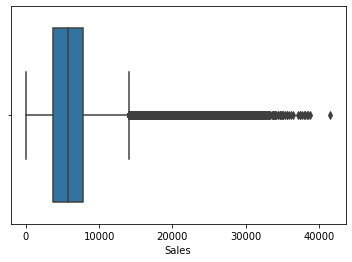

In [14]:
sns.boxplot(dbj1["Sales"])

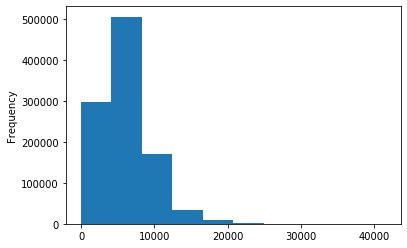

In [15]:
dbj1["Sales"].plot.hist()

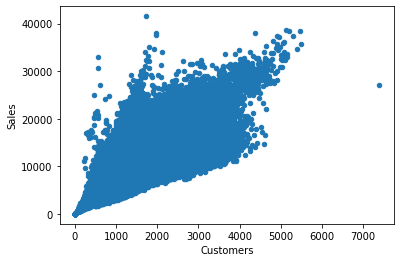

In [16]:
dbj1.plot.scatter("Customers", "Sales")

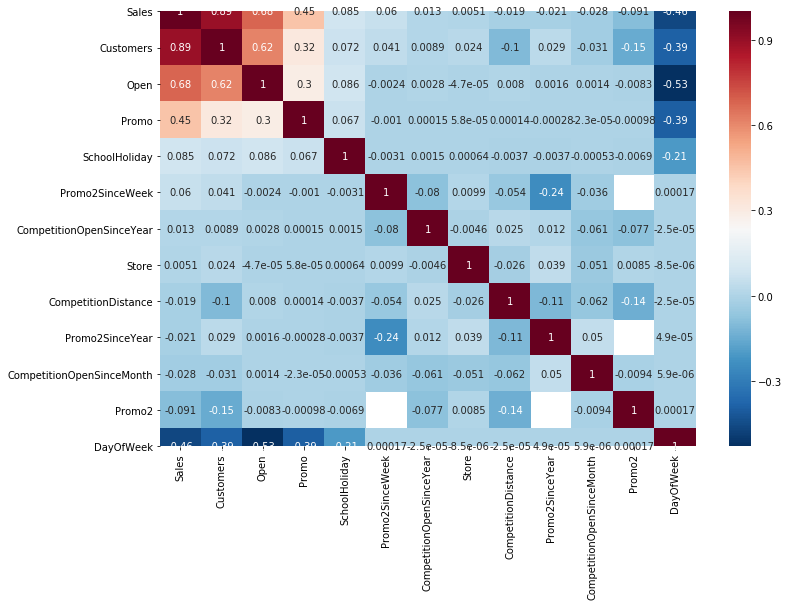

In [15]:
k = 15
#create a list called cols. that looks for the 10 largest correlations to SalePrice in the dataset . 
cols = dbj1.corr().nlargest(k, 'Sales')['Sales'].index
#create a correlation matrix using the list of columns created above. 
k_corr_matrix = dbj1[cols].corr()
#plot the figure with given dimensions. 
plot.figure(figsize=(12, 8))
#display the correlation matrix using seaborn's heatmap function. plot strength from red to blue.
sns.heatmap(k_corr_matrix, annot=True, cmap=plot.cm.RdBu_r)

In [9]:
%matplotlib inline
from IPython.display import Image

import pandas
from numpy.random import seed
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, MinMaxScaler

import statsmodels.formula.api as sm

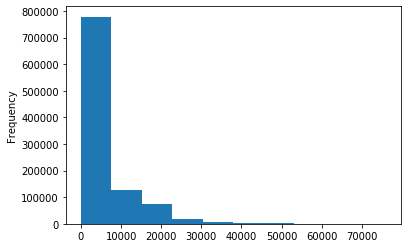

In [18]:
dbj1["CompetitionDistance"].plot.hist()

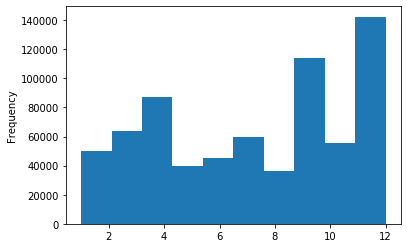

In [19]:
dbj1["CompetitionOpenSinceMonth"].plot.hist()

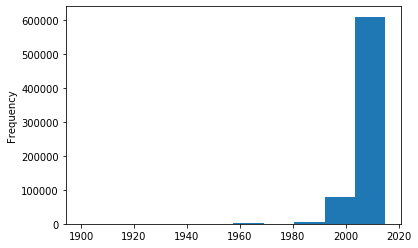

In [20]:
dbj1["CompetitionOpenSinceYear"].plot.hist()

In [10]:
# Fill missing data with 0s - This is a big assumption!
dbj1.fillna(0.0, inplace=True)

In [11]:
f = "Sales ~ CompetitionDistance + CompetitionOpenSinceMonth + CompetitionOpenSinceYear"
lm_raw = sm.ols(f, dbj1)\
       .fit()
lm_raw

In [10]:
lm_raw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     324.6
Date:                Sun, 14 Jun 2020   Prob (F-statistic):          1.13e-210
Time:                        18:19:21   Log-Likelihood:            -9.8408e+06
No. Observations:             1017209   AIC:                         1.968e+07
Df Residuals:                 1017205   BIC:                         1.968e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  5812.1569      7.280    798.335      0.000    5797.888    5826.426
CompetitionDistance          -0.0099      0.000    -20.035      0.000      -0.011      -0.009
CompetitionOpenSinceMonth   -35.6576      1.440    -24.768      0.000     -38.479     -32.836
CompetitionOpenSinceYear      0.1395      0.007     21.167      0.000       0.127       0.152
==============================================================================
Omnibus:                    97826.116   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197650.250
Skew:                           0.633   Prob(JB):                         0.00
Kurtosis:                       4.749   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Setup train and test set

In [12]:
from sklearn.model_selection import train_test_split
# Set the train and test data
# Stratify on the class labels to ensure even distribution
X = pandas.concat([dbj1[["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]],
                  ], axis=1
                 )
X.head()

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
0,1270.0,9.0,2008.0
1,570.0,11.0,2007.0
2,14130.0,12.0,2006.0
3,620.0,9.0,2009.0
4,29910.0,4.0,2015.0


In [13]:
x_train, x_test, y_train, y_test = train_test_split( X,
    dbj1["Sales"],
    test_size = 0.25
)

# Create model

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from numpy import exp, log1p, sqrt
import statsmodels.formula.api as sm
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


# Set the seed
np.random.seed(42)
# Let's jut use default parameters
mlp = MLPClassifier()
rforest = RandomForestClassifier(n_estimators=100)
logreg = LogisticRegression()
# Bundle up the models
models = [("mlp", mlp), ("random forest", rforest), ("log reg", logreg)]

# Run and evaluate model

In [16]:
# 1) KNN Regressor
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

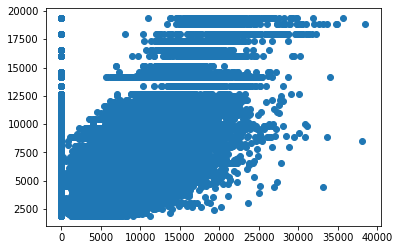

In [18]:
plot.scatter(y_test, y_pred)
plot.show()


In [20]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = knn.score(x_test, y_test)

2381.3652190314488
10918474.782797739
3304.3115444518453


In [23]:
# 2 ) Decision tree Regessor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)


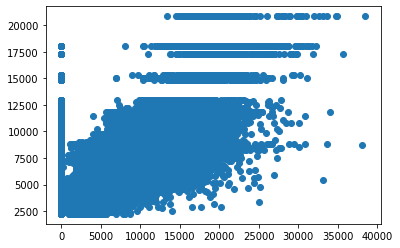

In [24]:
plot.scatter(y_test, y_pred)
plot.show()

In [27]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = dt.score(x_test, y_test)

2482.763859140186
11453524.639413292
3384.3056362292828


In [30]:
# 3) Random Forest Regressor
# After Hyper-parameter tunning 
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

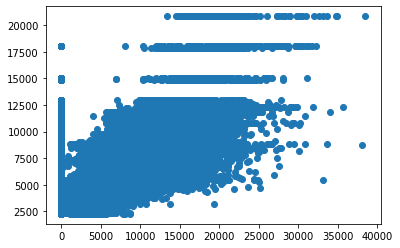

In [31]:
plot.scatter(y_test, y_pred)
plot.show()

In [35]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = rfr.score(x_test, y_test)

2481.704443803793
11446018.2332159
3383.1964520577135
